In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline

In [6]:
data_train = pd.DataFrame(pd.read_csv("./feature_2.csv",header = 0))

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 34 columns):
User_id                 int64
Merchant_id             int64
Coupon_id               float64
Discount_rate           object
Distance                float64
Date_received           float64
Date                    float64
coupon_use              int64
total_count             int64
coupon_count            int64
buy_count               int64
use_count               int64
coupon_not_use          int64
coupon_not_use_count    int64
not_buy                 int64
not_buy_count           int64
Discount_rate_num       float64
use_rate                float64
Discount_range          int64
count_2                 int64
2_use_count             int64
count_3                 int64
3_use_count             int64
count_4                 int64
4_use_count             int64
2_count                 int64
3_count                 int64
4_count                 int64
2_use                   float64
3_

In [9]:
gb = data_train.groupby('Merchant_id')

#cols  = ['User_id','Merchant_id']
# 对data_train按照当前的User_id特征列进行分组，统计个数

#该商家共有几条记录
count=gb.size().reset_index(drop=False)
count.rename(columns={0:'M_total_count'}, inplace = True)
#print(count)
data_train=data_train.merge(count,how='left',on='Merchant_id')

#该商家共发了几张券
count_m=gb['Coupon_id'].count().reset_index(drop=False)
count_m.rename(columns={'Coupon_id':'M_coupon_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Merchant_id')

#该商家共被购买几次
count_m=gb['Date'].count().reset_index(drop=False)
count_m.rename(columns={'Date':'M_buy_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Merchant_id')

data_train.head(10)


      Merchant_id  M_coupon_count
0               1               0
1               2               7
2               3              10
3               4               7
4               5              28
5               6               0
6               7               0
7               8               2
8               9               0
9              10               0
10             11               6
11             12               1
12             13               3
13             14              10
14             15              79
15             17              37
16             18              18
17             19              15
18             20              74
19             21               7
20             22               0
21             23               5
22             24               2
23             25              68
24             26               0
25             27               0
26             28              25
27             29               0
28            

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,coupon_use,total_count,coupon_count,...,4_count,2_use,3_use,4_use,2_use_rate,3_use_rate,4_use_rate,M_total_count,M_coupon_count,M_buy_count
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,0,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,60,43,21
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN,0,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,16549,15191,1434
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,60,43,21
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,60,43,21
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN,0,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,60,43,21
5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0,0,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,60,43,21
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0,1,7,5,...,0,0.25,0.0,0.0,1.0,0.0,0.0,60,43,21
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN,0,1,1,...,0,0.00,0.0,0.0,0.0,0.0,0.0,142190,122834,21843
8,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN,0,5,3,...,0,0.00,0.0,0.0,0.0,0.0,0.0,142190,122834,21843
9,2029232,450,1532.0,30:5,0.0,20160530.0,NaN,0,5,3,...,0,0.00,0.0,0.0,0.0,0.0,0.0,73866,63042,12285


In [12]:
#该商家的优惠券核销次数
gb = data_train.groupby('Merchant_id')
count_m=gb['coupon_use'].sum().reset_index(drop=False)
count_m.rename(columns={'coupon_use':'M_use_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Merchant_id')


In [17]:
gb = data_train.groupby('Merchant_id')
#未领取优惠券但购买了
'''
data_train['coupon_not_use'] = data_train['Date'].notnull()&data_train['Coupon_id'].isnull()
data_train['coupon_not_use'] = data_train[['coupon_not_use']].astype(int)
#print(data_train['coupon_not_use'])
'''

#该商家未领取优惠券但购买的次数
count_m=gb['coupon_not_use'].sum().reset_index(drop=False)
count_m.rename(columns={'coupon_not_use':'M_not_use_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Merchant_id')

#领取优惠券但未购买
'''
data_train['not_buy'] = data_train['Date'].isnull()&data_train['Coupon_id'].notnull()
data_train['not_buy'] = data_train[['not_buy']].astype(int)
#print(data_train['not_buy'])
'''
gb = data_train.groupby('Merchant_id')
#该商家被领取但不核销次数
count_m=gb['not_buy'].sum().reset_index(drop=False)
count_m.rename(columns={'not_buy':'M_not_buy_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Merchant_id')



In [20]:
#商家优惠券被领取后核销率
data_train['M_use_rate'] = data_train['M_use_count']/data_train['M_coupon_count']
data_train['M_use_rate'] = data_train['M_use_rate'].replace(np.nan, 0)


In [21]:
data_train.head(10)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,coupon_use,total_count,coupon_count,...,2_use_rate,3_use_rate,4_use_rate,M_total_count,M_coupon_count,M_buy_count,M_use_count,M_not_use_count,M_not_buy_count,M_use_rate
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,0,7,5,...,1.0,0.0,0.0,60,43,21,4,17,39,0.093023
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN,0,7,5,...,1.0,0.0,0.0,16549,15191,1434,76,1358,15115,0.005003
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,7,5,...,1.0,0.0,0.0,60,43,21,4,17,39,0.093023
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,7,5,...,1.0,0.0,0.0,60,43,21,4,17,39,0.093023
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN,0,7,5,...,1.0,0.0,0.0,60,43,21,4,17,39,0.093023
5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0,0,7,5,...,1.0,0.0,0.0,60,43,21,4,17,39,0.093023
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0,1,7,5,...,1.0,0.0,0.0,60,43,21,4,17,39,0.093023
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN,0,1,1,...,0.0,0.0,0.0,142190,122834,21843,2487,19356,120347,0.020247
8,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN,0,5,3,...,0.0,0.0,0.0,142190,122834,21843,2487,19356,120347,0.020247
9,2029232,450,1532.0,30:5,0.0,20160530.0,NaN,0,5,3,...,0.0,0.0,0.0,73866,63042,12285,1461,10824,61581,0.023175


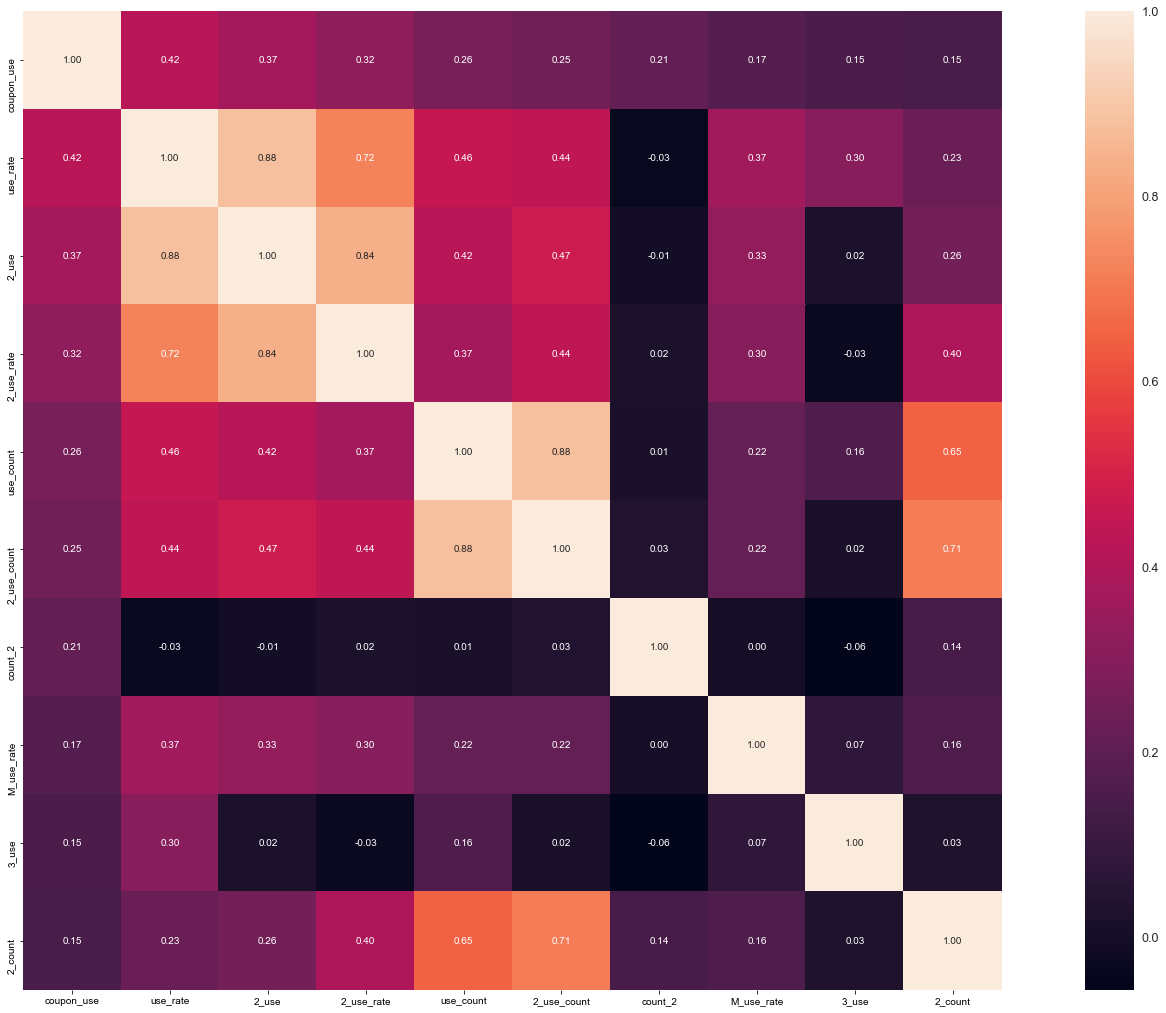

In [23]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(30, 18))
#sns.heatmap(corrmat, vmax=0.8, square=True,annot = True)

k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'coupon_use')['coupon_use'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [24]:
gb = data_train.groupby('Coupon_id')

#该券共有几条记录
count=gb.size().reset_index(drop=False)
count.rename(columns={0:'C_total_count'}, inplace = True)
data_train=data_train.merge(count,how='left',on='Coupon_id')

In [26]:
#该券共被使用几次
count_m=gb['Date'].count().reset_index(drop=False)
count_m.rename(columns={'Date':'C_use_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Coupon_id')

In [28]:
gb = data_train.groupby('Coupon_id')
#该券被领取但不核销次数
count_m=gb['not_buy'].sum().reset_index(drop=False)
count_m.rename(columns={'not_buy':'C_not_use_count'}, inplace = True)
#print(count_m)
data_train=data_train.merge(count_m,how='left',on='Coupon_id')

In [30]:
#商家优惠券被领取后核销率
data_train['C_use_rate'] = data_train['C_use_count']/data_train['C_total_count']
data_train['C_use_rate'] = data_train['C_use_rate'].replace(np.nan, 0)

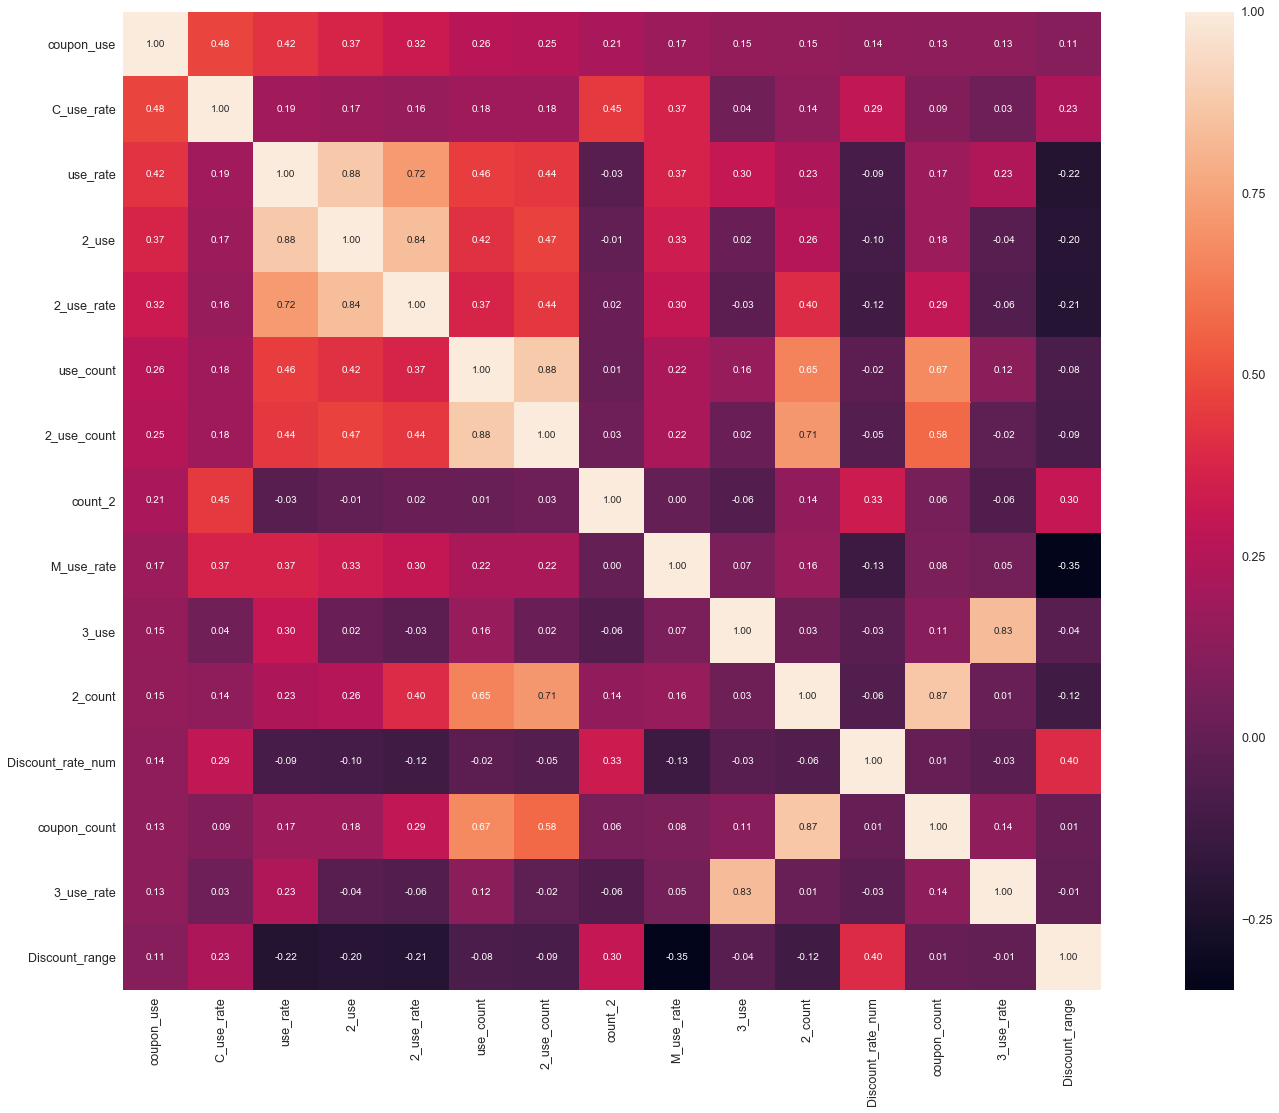

In [32]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(30, 18))
#sns.heatmap(corrmat, vmax=0.8, square=True,annot = True)

k  = 15 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'coupon_use')['coupon_use'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754884 entries, 0 to 1754883
Data columns (total 45 columns):
User_id                 int64
Merchant_id             int64
Coupon_id               float64
Discount_rate           object
Distance                float64
Date_received           float64
Date                    float64
coupon_use              int64
total_count             int64
coupon_count            int64
buy_count               int64
use_count               int64
coupon_not_use          int64
coupon_not_use_count    int64
not_buy                 int64
not_buy_count           int64
Discount_rate_num       float64
use_rate                float64
Discount_range          int64
count_2                 int64
2_use_count             int64
count_3                 int64
3_use_count             int64
count_4                 int64
4_use_count             int64
2_count                 int64
3_count                 int64
4_count                 int64
2_use                   float64
3_

In [127]:
import xgboost as xgb

#去除不要的行

#drop_cols = ['User_id','Merchant_id','Coupon_id','Discount_rate','Date_received','Date','coupon_not_use','not_buy'
            #,'count_2', 'count_3', 'count_4']
data_train_r = data_train.drop(columns = drop_cols)
X_train = data_train_r.drop(columns = ['coupon_use'])
Y_train = data_train_r.loc[:,'coupon_use'].values



'''
# 构造训练、验证集，抽样0.1做验证集
train_r=data_train_r.sample(frac = 0.9, random_state = 0, axis = 0)
X_train = train_r.drop(columns = ['coupon_use'])
Y_train=train_r.loc[:,'coupon_use'].values

valid_r = data_train_r[~data_train_r.index.isin(train_r.index)]
X_valid = valid_r.drop(columns = ['coupon_use'])
Y_valid = valid_r.loc[:,'coupon_use'].values
'''

"\n# 构造训练、验证集，抽样0.1做验证集\ntrain_r=data_train_r.sample(frac = 0.9, random_state = 0, axis = 0)\nX_train = train_r.drop(columns = ['coupon_use'])\nY_train=train_r.loc[:,'coupon_use'].values\n\nvalid_r = data_train_r[~data_train_r.index.isin(train_r.index)]\nX_valid = valid_r.drop(columns = ['coupon_use'])\nY_valid = valid_r.loc[:,'coupon_use'].values\n"

In [128]:
reg_model=xgb.XGBRegressor(max_depth=10, # 构建树的深度，越大越容易过拟合
                           n_estimators=5000, # 最佳迭代次数
                           learning_rate=0.1, # 学习率
                           n_jobs=-1) # 启动cpu所有核

reg_model.fit(X_train, # 训练集
              Y_train, # 训练集标签
              eval_set=[(X_train,Y_train)], # 验证集
              verbose = 10, # 训练多少轮打印一次结果
              early_stopping_rounds=10 # 每经过10轮rmse必须下降，否则停止训练
             )

[0]	validation_0-rmse:0.452774
Will train until validation_0-rmse hasn't improved in 10 rounds.
[10]	validation_0-rmse:0.189054
[20]	validation_0-rmse:0.120556
[30]	validation_0-rmse:0.10775
[40]	validation_0-rmse:0.104654
[50]	validation_0-rmse:0.103446
[60]	validation_0-rmse:0.10271
[70]	validation_0-rmse:0.101941
[80]	validation_0-rmse:0.101153
[90]	validation_0-rmse:0.100597
[100]	validation_0-rmse:0.100169
[110]	validation_0-rmse:0.099745
[120]	validation_0-rmse:0.099354
[130]	validation_0-rmse:0.098945
[140]	validation_0-rmse:0.098508
[150]	validation_0-rmse:0.098101
[160]	validation_0-rmse:0.097762
[170]	validation_0-rmse:0.097393
[180]	validation_0-rmse:0.097033
[190]	validation_0-rmse:0.096725
[200]	validation_0-rmse:0.096453
[210]	validation_0-rmse:0.096075
[220]	validation_0-rmse:0.09572
[230]	validation_0-rmse:0.095372
[240]	validation_0-rmse:0.094961
[250]	validation_0-rmse:0.09454
[260]	validation_0-rmse:0.094319
[270]	validation_0-rmse:0.094043
[280]	validation_0-rmse:0.

[2440]	validation_0-rmse:0.072398
[2450]	validation_0-rmse:0.07237
[2460]	validation_0-rmse:0.072336
[2470]	validation_0-rmse:0.072304
[2480]	validation_0-rmse:0.072273
[2490]	validation_0-rmse:0.072262
[2500]	validation_0-rmse:0.07225
[2510]	validation_0-rmse:0.072237
[2520]	validation_0-rmse:0.072215
[2530]	validation_0-rmse:0.072198
[2540]	validation_0-rmse:0.072178
[2550]	validation_0-rmse:0.072152
[2560]	validation_0-rmse:0.07214
[2570]	validation_0-rmse:0.07213
[2580]	validation_0-rmse:0.07211
[2590]	validation_0-rmse:0.072073
[2600]	validation_0-rmse:0.072026
[2610]	validation_0-rmse:0.07201
[2620]	validation_0-rmse:0.07199
[2630]	validation_0-rmse:0.071975
[2640]	validation_0-rmse:0.071966
[2650]	validation_0-rmse:0.071945
[2660]	validation_0-rmse:0.071923
[2670]	validation_0-rmse:0.071907
[2680]	validation_0-rmse:0.071886
[2690]	validation_0-rmse:0.071876
[2700]	validation_0-rmse:0.071869
[2710]	validation_0-rmse:0.071854
[2720]	validation_0-rmse:0.071823
[2730]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
#读取测试文件
data_test = pd.DataFrame(pd.read_csv("./ccf_offline_stage1_test_revised.csv",header = 0))
data_test.duplicated().value_counts()

False    112803
True        837
dtype: int64

In [44]:
#得到券的折扣率，无券为0
data_test['Discount_rate_num'] =data_test['Discount_rate'].isnull().apply(lambda x: 0 if x else 1)
x = []
for i,j in zip(data_test['Discount_rate_num'], data_test['Discount_rate']):
    #print(i,j)
    if i == 0:
        x.append(0)
    else:
        a = j.split(':')
        a = list(map(float, a))
        if len(a) < 2:
            x.append(a[0])
        else:
            x.append(a[1]/a[0])
    
    
data_test['Discount_rate_num'] = x
#data_test
#print(data_test['Discount_rate_num'])

In [108]:
#得到用户的券的满减区间 0-50 为 ‘2’ 50-200 为‘3’ 200-500 为‘4’ 直接折扣为 ‘1’

data_test['Discount_range'] =data_test['Discount_rate'].isnull().apply(lambda x: 0 if x else 1)
x = []
for i,j in zip(data_test['Discount_range'], data_test['Discount_rate']):
    #print(i,j)
    if i == 0:
        x.append('0')
    else:
        a = j.split(':')
        a = list(map(float, a))
        if len(a) < 2:
            x.append('1')
        else:
            if a[0] <= 50:
                x.append('2')
            elif a[0] <= 200:
                x.append('3')
            else:
                x.append('4')
    
    
data_test['Discount_range'] = x
#data_test


In [109]:
#用户信息合并列
cols = ['User_id','total_count','coupon_count','buy_count','use_count','coupon_not_use_count','not_buy_count']
user_train_merge = data_train[cols]
user_train_merge = user_train_merge.drop_duplicates()

#合并
data_test_merge = pd.merge(data_test,user_train_merge,on='User_id',how='left')

In [110]:
#商家信息合并列
cols = ['Merchant_id','M_total_count','M_coupon_count','M_buy_count','M_use_count','M_not_use_count','M_not_buy_count','M_use_rate']
m_train_merge = data_train[cols]
m_train_merge = m_train_merge.drop_duplicates()

#合并
data_test_merge1 = pd.merge(data_test_merge,m_train_merge,on='Merchant_id',how='left')

In [111]:
#商家信息合并列
cols = ['Coupon_id','C_total_count','C_use_count','C_not_use_count','C_use_rate']
#data_train['Coupon_id'] = 
data_train['Coupon_id'] = data_train['Coupon_id'].replace(np.nan, 0)
data_train['Coupon_id'] = data_train[['Coupon_id']].astype(int)
data_train['Coupon_id'] = data_train['Coupon_id'].replace(0, np.nan)
c_train_merge = data_train[cols]
c_train_merge = c_train_merge.drop_duplicates()
#合并
data_test_merge2 = pd.merge(data_test_merge1,c_train_merge,on='Coupon_id',how='left')

In [112]:
cols = ['User_id', '2_use_count', '3_use_count','4_use_count','2_use','3_use','4_use','2_use_rate','3_use_rate','4_use_rate']
user_train_merge = data_train[cols]
user_train_merge = user_train_merge.drop_duplicates()

#合并
data_test_merge3 = pd.merge(data_test_merge2,user_train_merge,on='User_id',how='left')

In [113]:
cols = ['User_id', '2_count' ,'use_rate', '4_count', '3_count']
user_train_merge = data_train[cols]
user_train_merge = user_train_merge.drop_duplicates()

#合并
data_test_merge4 = pd.merge(data_test_merge3,user_train_merge,on='User_id',how='left')

In [114]:
data_test_merge4.duplicated().value_counts()
data_test_merge4.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Discount_rate_num', 'Discount_range', 'total_count',
       'coupon_count', 'buy_count', 'use_count', 'coupon_not_use_count',
       'not_buy_count', 'M_total_count', 'M_coupon_count', 'M_buy_count',
       'M_use_count', 'M_not_use_count', 'M_not_buy_count', 'M_use_rate',
       'C_total_count', 'C_use_count', 'C_not_use_count', 'C_use_rate',
       '2_use_count', '3_use_count', '4_use_count', '2_use', '3_use', '4_use',
       '2_use_rate', '3_use_rate', '4_use_rate', '2_count', 'use_rate',
       '4_count', '3_count'],
      dtype='object')

In [116]:
cols = X_train.columns.tolist()
data_test_merge4['Discount_range'] = data_test_merge4['Discount_range'].astype(int)
#y_pred=reg_model.predict(data_test_merge4[cols])

In [129]:
y_pred=reg_model.predict(data_test_merge4[cols])

In [130]:
y_pred.shape

(113640,)

In [131]:
data_test['Probability'] = y_pred
data_test['Probability'] = data_test['Probability'].apply(lambda x: x if x >= 0.0 else 0.0 )
data_test['Probability'] = data_test['Probability'].apply(lambda x: x if x <= 1.0 else 1.0 )
data_test['Probability'].max()

1.0

In [132]:
data_test.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Discount_rate_num,Discount_range,Probability
0,4129537,450,9983,30:5,1.0,20160712,0.166667,2,0.000018
1,6949378,1300,3429,30:5,NaN,20160706,0.166667,2,0.159468
2,2166529,7113,6928,200:20,5.0,20160727,0.100000,3,0.000000
3,2166529,7113,1808,100:10,5.0,20160727,0.100000,3,0.000150
4,6172162,7605,6500,30:1,2.0,20160708,0.033333,2,0.005271


In [133]:
res_cols = ['User_id', 'Coupon_id', 'Date_received', 'Probability']
data_test[res_cols].to_csv('./res_4.csv',index=False,header = 0)

In [125]:
data_train.to_csv('./feature_3.csv', index = False)